<a href="https://colab.research.google.com/github/laribar/bitcoinprediction/blob/main/bitcoinprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import pandas as pd
import requests
import io

url = 'https://raw.githubusercontent.com/laribar/bitcoinprediction/refs/heads/main/Bitcoin%20Historical%20Data.csv'

# Fazer o download do arquivo CSV
response = requests.get(url)
data = response.content.decode('utf-8')

# Substituir as vírgulas dentro das aspas por um caractere temporário
data = data.replace('","', '";"').replace('"', '')

# Ler o CSV com pandas, agora com ';' como delimitador
df = pd.read_csv(io.StringIO(data), sep=';')

# Exibir as primeiras linhas do DataFrame para verificar a leitura
print(df.head())
print(df.info())


             Date,Price       Open       High        Low    Vol. Change %
0  02/01/2025,101,845.0  102,421.3  102,770.8  101,486.2  72.86K   -0.57%
1  01/31/2025,102,424.2  104,726.9  105,876.3  101,576.0  82.79K   -2.20%
2  01/30/2025,104,726.9  103,723.0  106,409.1  103,388.4  74.84K    0.97%
3  01/29/2025,103,722.0  101,342.1  104,760.0  101,340.6  74.38K    2.34%
4  01/28/2025,101,349.3  102,085.2  103,584.1  100,288.0  74.69K   -0.73%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date,Price  4414 non-null   object
 1   Open        4414 non-null   object
 2   High        4414 non-null   object
 3   Low         4414 non-null   object
 4   Vol.        4414 non-null   object
 5   Change %    4414 non-null   object
dtypes: object(6)
memory usage: 207.0+ KB
None


In [325]:
import pandas as pd
import requests
import io

url = 'https://raw.githubusercontent.com/laribar/bitcoinprediction/refs/heads/main/Bitcoin%20Historical%20Data.csv'

# Fazer o download do arquivo CSV
response = requests.get(url)
data = response.content.decode('utf-8')

# Substituir as vírgulas dentro das aspas por um ponto e vírgula temporário e remover aspas
data = data.replace('","', '";"').replace('"', '')

# Ler o CSV com pandas, agora com ';' como delimitador
df = pd.read_csv(io.StringIO(data), sep=';')

# Certificar-se de que todas as linhas têm o mesmo número de colunas
df[['Date', 'Price']] = df['Date,Price'].str.split(',', expand=True, n=1)
df.drop(columns=['Date,Price'], inplace=True)

# Exibir as primeiras linhas do DataFrame para verificar a leitura
print(df.head())
print(df.info())


        Open       High        Low    Vol. Change %        Date      Price
0  102,421.3  102,770.8  101,486.2  72.86K   -0.57%  02/01/2025  101,845.0
1  104,726.9  105,876.3  101,576.0  82.79K   -2.20%  01/31/2025  102,424.2
2  103,723.0  106,409.1  103,388.4  74.84K    0.97%  01/30/2025  104,726.9
3  101,342.1  104,760.0  101,340.6  74.38K    2.34%  01/29/2025  103,722.0
4  102,085.2  103,584.1  100,288.0  74.69K   -0.73%  01/28/2025  101,349.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Open      4414 non-null   object
 1   High      4414 non-null   object
 2   Low       4414 non-null   object
 3   Vol.      4414 non-null   object
 4   Change %  4414 non-null   object
 5   Date      4414 non-null   object
 6   Price     4414 non-null   object
dtypes: object(7)
memory usage: 241.5+ KB
None


In [326]:
import pandas as pd
import requests
import io

url = 'https://raw.githubusercontent.com/laribar/bitcoinprediction/refs/heads/main/Bitcoin%20Historical%20Data.csv'

# Fazer o download do arquivo CSV
response = requests.get(url)
data = response.content.decode('utf-8')

# Substituir as vírgulas dentro das aspas por um ponto e vírgula temporário e remover aspas
data = data.replace('","', '";"').replace('"', '')

# Ler o CSV com pandas, agora com ';' como delimitador e especificando o tipo string para todas as colunas
df = pd.read_csv(io.StringIO(data), sep=';', dtype=str)

# Separar a coluna "Date,Price" em duas colunas "Date" e "Price"
df[['Date', 'Price']] = df['Date,Price'].str.split(',', expand=True, n=1)
df.drop(columns=['Date,Price'], inplace=True)

# Converter a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Função para converter os valores da coluna "Vol."
def convert_volume(value):
    value = value.replace('K', 'e3').replace('M', 'e6').replace('B', 'e9')
    return float(value) if '.' in value or 'e' in value else int(value)

# Converter a coluna 'Vol.' utilizando a função de conversão
df['Vol.'] = df['Vol.'].apply(convert_volume)

# Converter as colunas numéricas para o tipo float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

# Verificar e ajustar os tipos de dados
df['Vol.'] = pd.to_numeric(df['Vol.'], downcast='integer')

# Exibir as primeiras linhas do DataFrame para verificar a leitura
print(df.head())
print(df.info())


       Open      High       Low   Vol.  Change %       Date     Price
0  102421.3  102770.8  101486.2  72860     -0.57 2025-02-01  101845.0
1  104726.9  105876.3  101576.0  82790     -2.20 2025-01-31  102424.2
2  103723.0  106409.1  103388.4  74840      0.97 2025-01-30  104726.9
3  101342.1  104760.0  101340.6  74380      2.34 2025-01-29  103722.0
4  102085.2  103584.1  100288.0  74690     -0.73 2025-01-28  101349.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Open      4414 non-null   float64       
 1   High      4414 non-null   float64       
 2   Low       4414 non-null   float64       
 3   Vol.      4414 non-null   int64         
 4   Change %  4414 non-null   float64       
 5   Date      4414 non-null   datetime64[ns]
 6   Price     4414 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [327]:
import pandas as pd

# Supondo que df já esteja definido e carregado com dados
# Convertendo a coluna Date para o tipo datetime, se ainda não foi feita
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Definir a coluna Date como índice
df.set_index('Date', inplace=True)

# Ordenar o DataFrame pelo índice datetime
df.sort_index(ascending=False, inplace=True)

# Verificar as primeiras linhas para confirmação
print(df.head())

                Open      High       Low   Vol.  Change %     Price
Date                                                               
2025-02-01  102421.3  102770.8  101486.2  72860     -0.57  101845.0
2025-01-31  104726.9  105876.3  101576.0  82790     -2.20  102424.2
2025-01-30  103723.0  106409.1  103388.4  74840      0.97  104726.9
2025-01-29  101342.1  104760.0  101340.6  74380      2.34  103722.0
2025-01-28  102085.2  103584.1  100288.0  74690     -0.73  101349.3


In [328]:
print(df.describe())

                Open           High            Low          Vol.     Change %  \
count    4414.000000    4414.000000    4414.000000  4.414000e+03  4414.000000   
mean    17401.827843   17808.284164   16978.059493  1.399841e+07     0.353446   
std     22555.420801   23052.956968   22053.747670  1.647671e+08     6.948209   
min        13.300000      13.400000      13.200000  2.600000e+02   -57.210000   
25%       582.075000     591.450000     569.300000  4.163250e+04    -1.290000   
50%      7435.500000    7638.200000    7290.100000  8.417000e+04     0.140000   
75%     27886.250000   28370.950000   27273.850000  2.276500e+05     1.840000   
max    106157.200000  109228.600000  105350.600000  4.470000e+09   336.840000   

               Price  
count    4414.000000  
mean    17424.835569  
std     22589.689454  
min        13.300000  
25%       582.375000  
50%      7456.050000  
75%     27919.625000  
max    106157.200000  


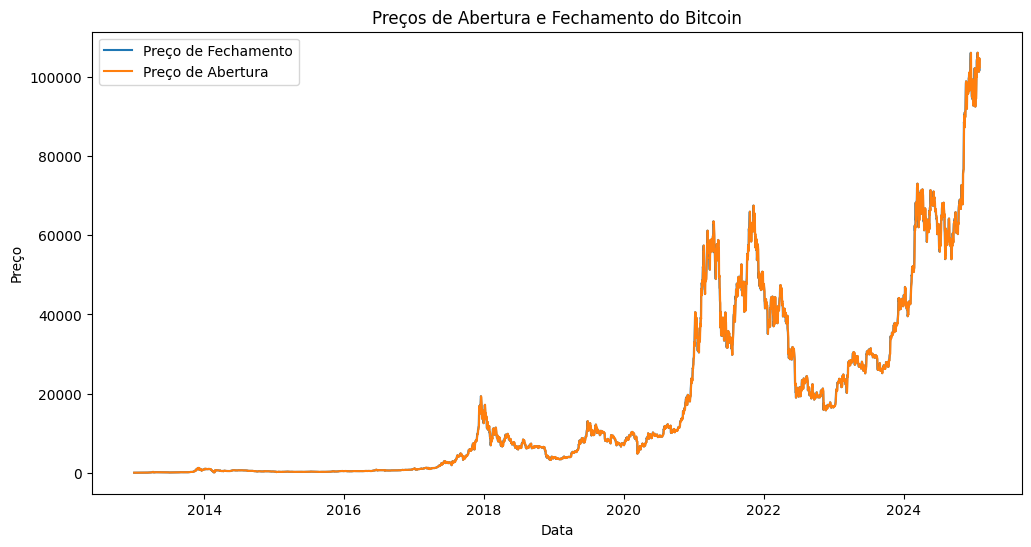

In [329]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Price'], label='Preço de Fechamento')
plt.plot(df.index, df['Open'], label='Preço de Abertura')
plt.title('Preços de Abertura e Fechamento do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [330]:
correlation_matrix = df.corr()
print(correlation_matrix)

              Open      High       Low      Vol.  Change %     Price
Open      1.000000  0.999626  0.999455  0.084295 -0.024523  0.999226
High      0.999626  1.000000  0.999328  0.084844 -0.017507  0.999668
Low       0.999455  0.999328  1.000000  0.083530 -0.016885  0.999588
Vol.      0.084295  0.084844  0.083530  1.000000 -0.005841  0.083767
Change % -0.024523 -0.017507 -0.016885 -0.005841  1.000000 -0.011552
Price     0.999226  0.999668  0.999588  0.083767 -0.011552  1.000000


In [331]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assumindo que seu DataFrame se chama 'df' e o índice já é a data
df = df.sort_index()  # Garante que os dados estão ordenados por data

# Criar features adicionais
df['MA7'] = df['Price'].rolling(window=7).mean()
df['MA30'] = df['Price'].rolling(window=30).mean()
df['Price_Lag1'] = df['Price'].shift(1)
df['Price_Lag7'] = df['Price'].shift(7)
df['Return'] = df['Price'].pct_change()
df['Volatility'] = df['Return'].rolling(window=30).std()

# Remover linhas com valores NaN
df = df.dropna()

# Selecionar features para o modelo
features = ['Open', 'High', 'Low']
target = 'Price'

# Separar features e target
X = df[features]
y = df[target]

# Normalizar as features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [332]:
# Criar e treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

Mean Squared Error: 98814174.64893356
Mean Absolute Error: 3682.2160558722894
R-squared Score: 0.8345860605338362


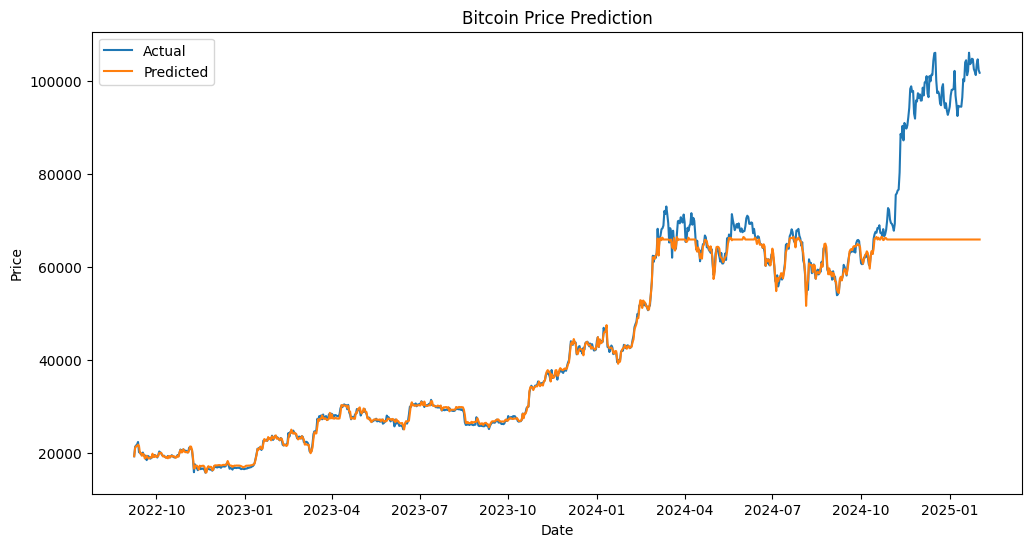

In [333]:
# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Visualizar resultados
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

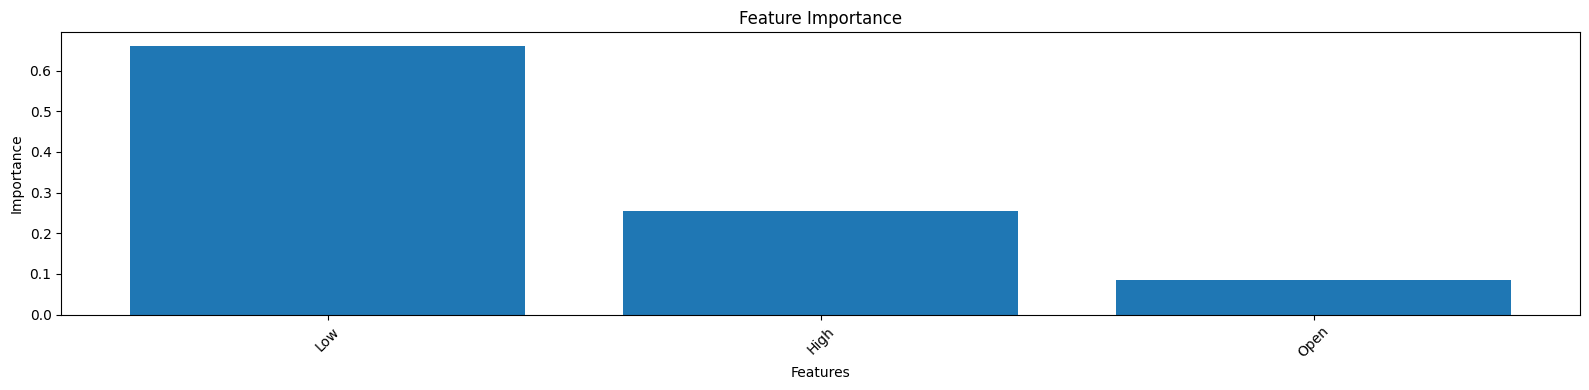

In [334]:
# Calcular e visualizar a importância das features
feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(16,4))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [335]:
# Atualizando as features
selected_features = ['Low', 'High', 'Open']
X = df[selected_features]

In [336]:
from sklearn.model_selection import RandomizedSearchCV

# Definir o espaço de hiperparâmetros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar busca aleatória
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Usar o melhor modelo encontrado
best_model = random_search.best_estimator_

In [337]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# Imprimir a melhor pontuação
print(f"\nMelhor pontuação: {random_search.best_score_:.4f}")

# Usar o melhor modelo para fazer previsões
y_pred_best = best_model.predict(X_test)

# Calcular as métricas de desempenho para o melhor modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nMétricas do melhor modelo:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"Mean Absolute Error: {mae_best:.2f}")
print(f"R-squared Score: {r2_best:.4f}")

Melhores parâmetros encontrados:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}

Melhor pontuação: 0.3957

Métricas do melhor modelo:
Mean Squared Error: 97997027.36
Mean Absolute Error: 3664.74
R-squared Score: 0.8360


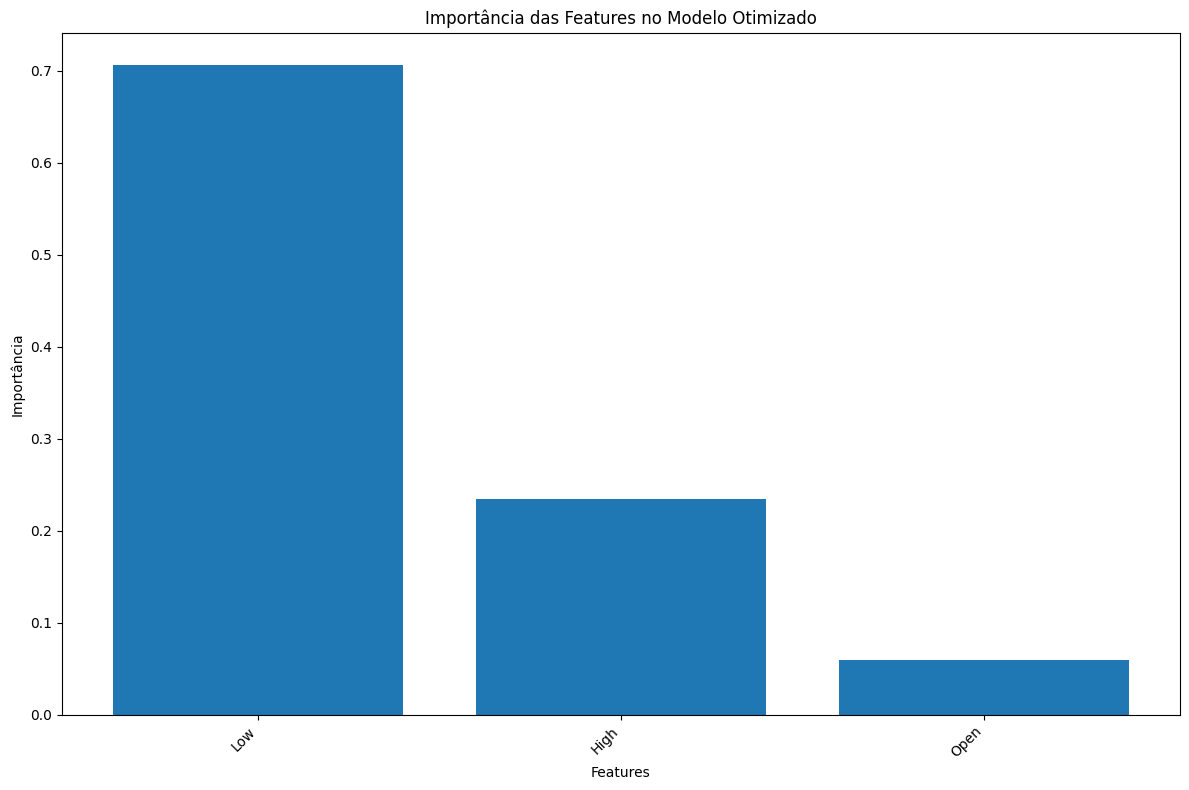

  feature  importance
2     Low    0.705901
1    High    0.234292
0    Open    0.059807


In [338]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter a importância das features do melhor modelo
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualizar a importância das features
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Importância das Features no Modelo Otimizado')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir os valores de importância
print(feature_importance)

Mean Squared Error: 101858748.97258964
Mean Absolute Error: 3710.3030896119194
R-squared Score: 0.8294605453012247


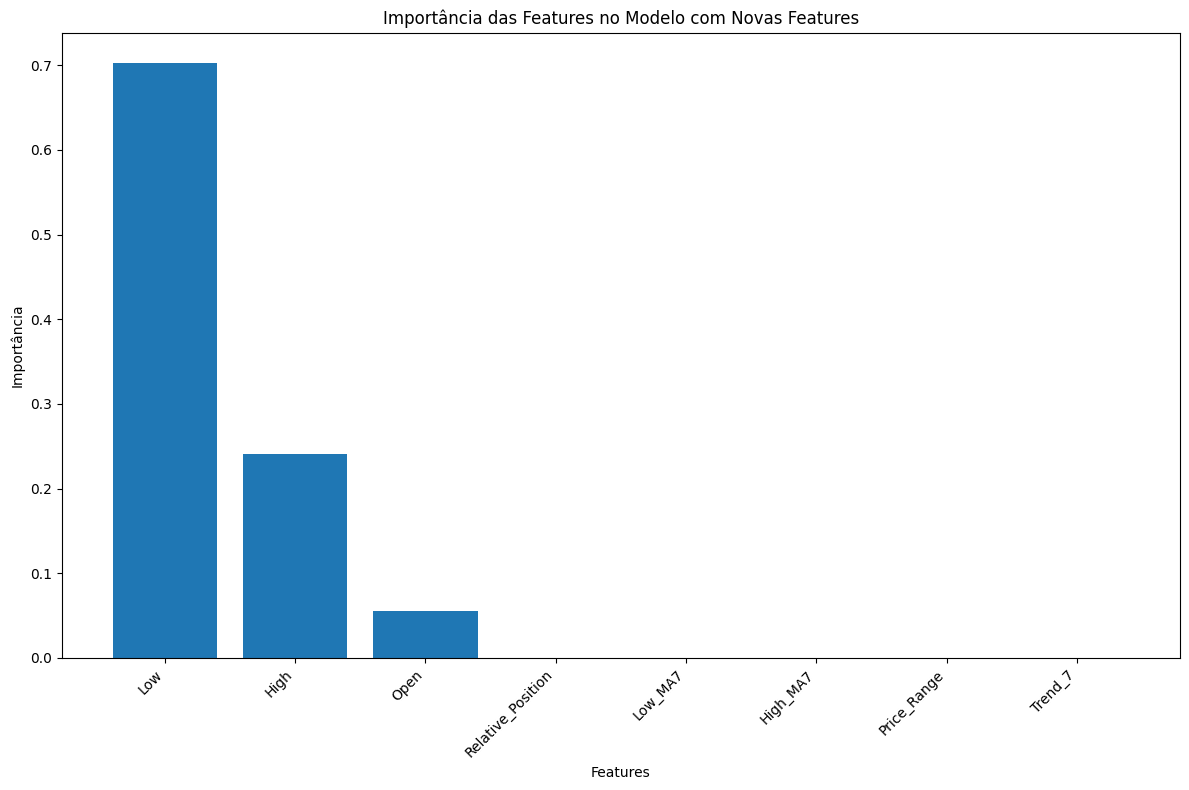

             feature  importance
0                Low    0.703140
1               High    0.241235
2               Open    0.055032
4  Relative_Position    0.000246
5            Low_MA7    0.000138
6           High_MA7    0.000128
3        Price_Range    0.000043
7            Trend_7    0.000037


In [339]:
import numpy as np

def add_new_features(df):
    # Range de preço (diferença entre High e Low)
    df['Price_Range'] = df['High'] - df['Low']

    # Posição relativa do preço de fechamento no range diário
    df['Relative_Position'] = (df['Price'] - df['Low']) / (df['High'] - df['Low'])

    # Média móvel de 7 dias do Low
    df['Low_MA7'] = df['Low'].rolling(window=7).mean()

    # Média móvel de 7 dias do High
    df['High_MA7'] = df['High'].rolling(window=7).mean()

    # Tendência de 7 dias (inclinação da linha de tendência)
    df['Trend_7'] = df['Price'].rolling(window=7).apply(lambda x: np.polyfit(range(7), x, 1)[0])

    return df

# Aplicar as novas features
df = add_new_features(df)

# Remover linhas com NaN (devido às médias móveis)
df = df.dropna()

# Atualizar a lista de features
features = ['Low', 'High', 'Open', 'Price_Range', 'Relative_Position', 'Low_MA7', 'High_MA7', 'Trend_7']

# Preparar os dados para o modelo
X = df[features]
y = df['Price']

# Dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar o modelo com as novas features
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=400, max_depth=50, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Visualizar a nova importância das features
feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Importância das Features no Modelo com Novas Features')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(feature_importance)

Random Forest Results:
Mean Squared Error: 97788935.91094603
Mean Absolute Error: 3665.831541381305
R-squared Score: 0.8362745274800696


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMA Results:
Mean Squared Error: 1286834308.433685
Mean Absolute Error: 26627.246588034413
R-squared Score: -1.1545132201359776


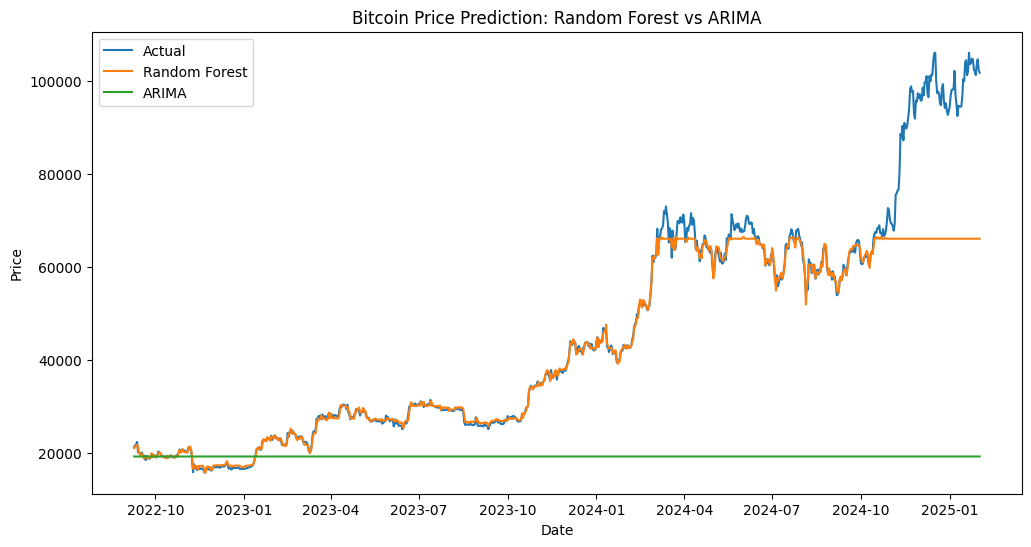

In [340]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Simplificar o conjunto de features
features = ['Low', 'High', 'Open']
X = df[features]
y = df['Price']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar o modelo Random Forest simplificado
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=400, max_depth=50, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões com Random Forest
rf_pred = rf_model.predict(X_test)

# Calcular métricas para Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared Score: {rf_r2}")

# Preparar dados para ARIMA
train_data = y_train
test_data = y_test

# Ajustar modelo ARIMA
# Nota: Os parâmetros (5,1,0) são um ponto de partida e podem precisar de ajuste
arima_model = ARIMA(train_data, order=(5,1,0))
arima_results = arima_model.fit()

# Fazer previsões com ARIMA
arima_pred = arima_results.forecast(steps=len(test_data))

# Calcular métricas para ARIMA
arima_mse = mean_squared_error(test_data, arima_pred)
arima_mae = mean_absolute_error(test_data, arima_pred)
arima_r2 = r2_score(test_data, arima_pred)

print("\nARIMA Results:")
print(f"Mean Squared Error: {arima_mse}")
print(f"Mean Absolute Error: {arima_mae}")
print(f"R-squared Score: {arima_r2}")

# Visualizar resultados
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, rf_pred, label='Random Forest')
plt.plot(test_data.index, arima_pred, label='ARIMA')
plt.title('Bitcoin Price Prediction: Random Forest vs ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Ensemble Results:
Mean Squared Error: 102534338.49389435
Mean Absolute Error: 3795.3901369551027
R-squared Score: 0.8283294233335425


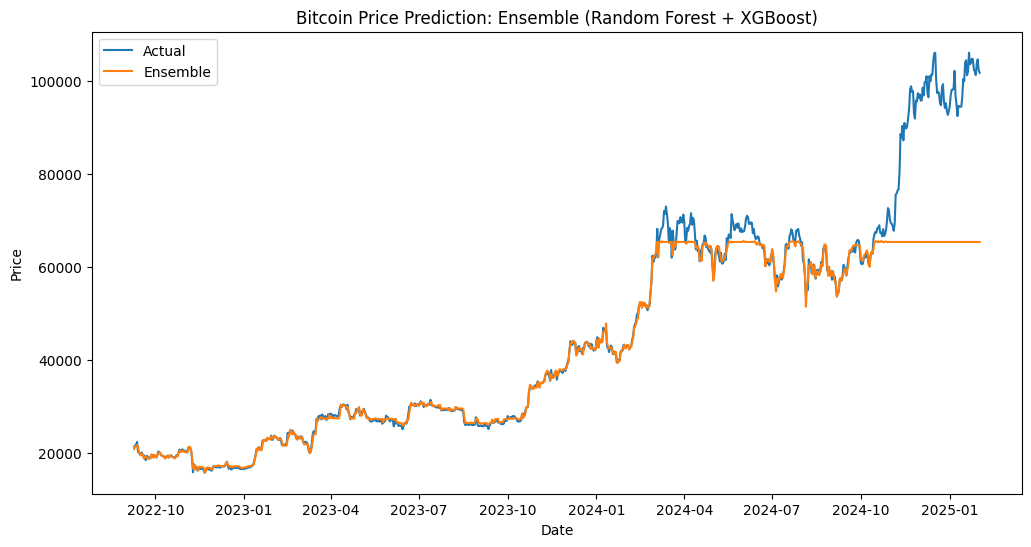


Importância das features (Ensemble):
         importance
feature            
Low        0.538535
High       0.292014
Open       0.169452


In [345]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Preparar os dados
features = ['Low', 'High', 'Open']
X = df[features]
y = df['Price']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar Random Forest
rf = RandomForestRegressor(n_estimators=400, max_depth=50, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Treinar XGBoost
xgb = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Criar ensemble (média simples das previsões)
ensemble_pred = (rf_pred + xgb_pred) / 2

# Calcular métricas para o ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("Ensemble Results:")
print(f"Mean Squared Error: {ensemble_mse}")
print(f"Mean Absolute Error: {ensemble_mae}")
print(f"R-squared Score: {ensemble_r2}")

# Visualizar resultados
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, ensemble_pred, label='Ensemble')
plt.title('Bitcoin Price Prediction: Ensemble (Random Forest + XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calcular e imprimir a importância das features (média dos dois modelos)
rf_importance = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_})
xgb_importance = pd.DataFrame({'feature': features, 'importance': xgb.feature_importances_})
ensemble_importance = (rf_importance.set_index('feature') + xgb_importance.set_index('feature')) / 2
ensemble_importance = ensemble_importance.sort_values('importance', ascending=False)
print("\nImportância das features (Ensemble):")
print(ensemble_importance)

In [346]:
def add_temporal_features(df):
    df['SMA_7'] = df['Price'].rolling(window=7).mean()  # Média móvel de 7 dias
    df['SMA_30'] = df['Price'].rolling(window=30).mean()  # Média móvel de 30 dias
    df['Volatility'] = df['Price'].rolling(window=7).std()  # Volatilidade de 7 dias
    df['Price_Change'] = df['Price'].pct_change()  # Mudança percentual diária
    return df

# Adicionar as novas features
df = add_temporal_features(df)
df = df.dropna()  # Remover valores nulos criados pelas médias móveis

In [347]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [348]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
xgb = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)

Ensemble Results (com features temporais):
Mean Squared Error: 103416426.1280156
Mean Absolute Error: 3761.8099636865268
R-squared Score: 0.826861267745754


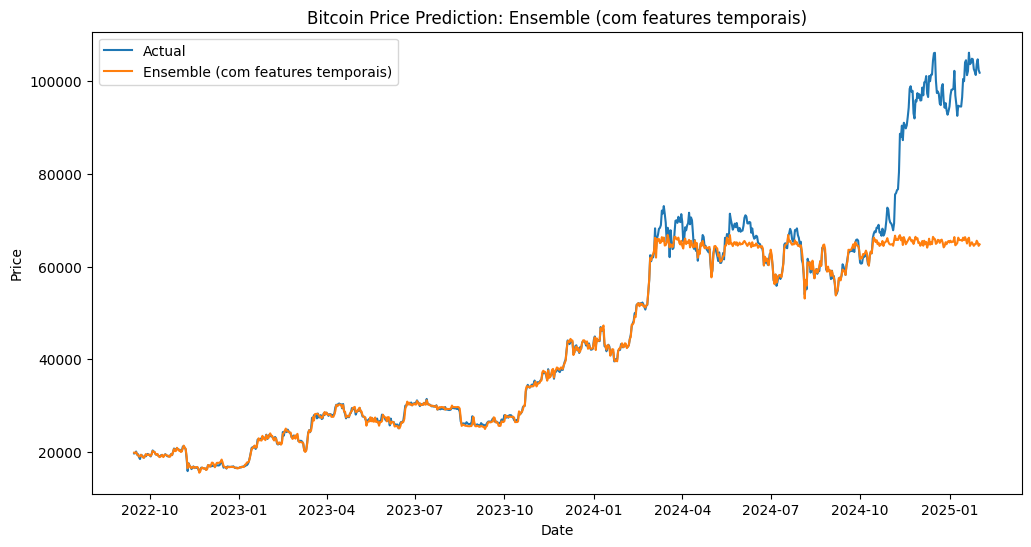

In [349]:
# Adicionar features temporais
df = add_temporal_features(df)

# Atualizar as features utilizadas no modelo
features = ['Low', 'High', 'Open', 'SMA_7', 'SMA_30', 'Volatility', 'Price_Change']
X = df[features]
y = df['Price']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Treinar XGBoost
xgb = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Criar ensemble
ensemble_pred = (rf_pred + xgb_pred) / 2

# Avaliar o ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("Ensemble Results (com features temporais):")
print(f"Mean Squared Error: {ensemble_mse}")
print(f"Mean Absolute Error: {ensemble_mae}")
print(f"R-squared Score: {ensemble_r2}")

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, ensemble_pred, label='Ensemble (com features temporais)')
plt.title('Bitcoin Price Prediction: Ensemble (com features temporais)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [350]:
def add_volatility_features(df):
    df['Daily_Return'] = df['Price'].pct_change()  # Retorno diário
    df['Volatility_7'] = df['Price'].rolling(window=7).std()  # Volatilidade em 7 dias
    df['Volatility_30'] = df['Price'].rolling(window=30).std()  # Volatilidade em 30 dias
    df['Price_Change_Abs'] = df['Price'].diff().abs()  # Mudança absoluta diária
    return df

# Aplicar as novas features
df = add_volatility_features(df)
df = df.dropna()

Ensemble Results (com ajuste de volatilidade):
Mean Squared Error: 103276073.23711604
Mean Absolute Error: 3793.1238450445608
R-squared Score: 0.8269155423353292


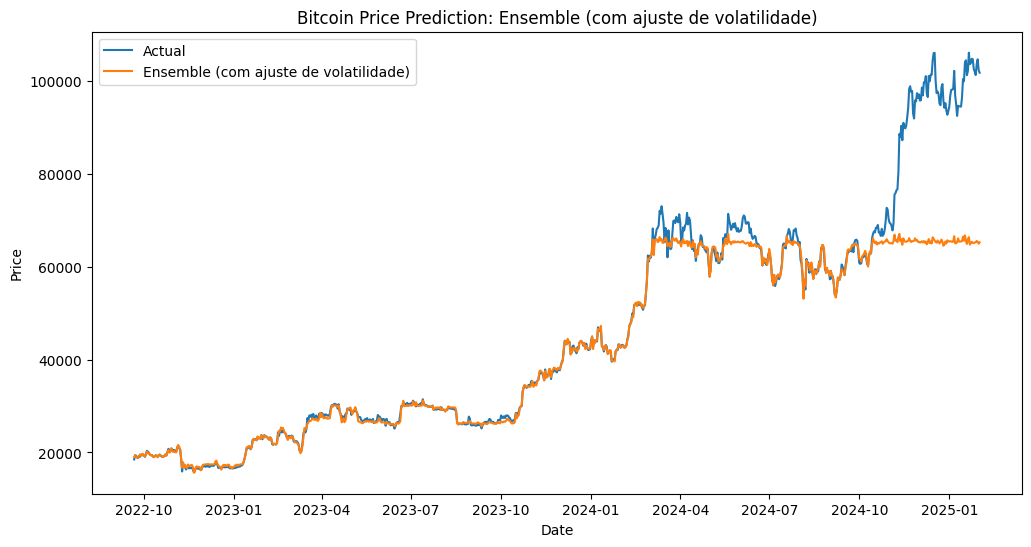

In [351]:
# Adicionar features de volatilidade
df = add_volatility_features(df)

# Atualizar as features usadas no modelo
features = ['Low', 'High', 'Open', 'SMA_7', 'SMA_30', 'Volatility_7', 'Volatility_30', 'Daily_Return', 'Price_Change_Abs']
X = df[features]
y = df['Price']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Treinar XGBoost
xgb = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Criar ensemble com pesos ajustados
volatility_weight = X_test['Volatility_7'] / (X_test['Volatility_7'] + X_test['Volatility_30'])
ensemble_pred = (rf_pred * (1 - volatility_weight) + xgb_pred * volatility_weight)

# Avaliar o ensemble ajustado
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("Ensemble Results (com ajuste de volatilidade):")
print(f"Mean Squared Error: {ensemble_mse}")
print(f"Mean Absolute Error: {ensemble_mae}")
print(f"R-squared Score: {ensemble_r2}")

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, ensemble_pred, label='Ensemble (com ajuste de volatilidade)')
plt.title('Bitcoin Price Prediction: Ensemble (com ajuste de volatilidade)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 0.0053
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.4912e-04
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 2.6170e-04
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 2.0893e-04
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 1.8086e-04
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 1.4090e-04
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.4725e-04
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 1.4841e-04
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1.2770e-04
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 1.1282e-04
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 1.3213e-04
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 1.3426e-04
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 1.1145e-04
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss

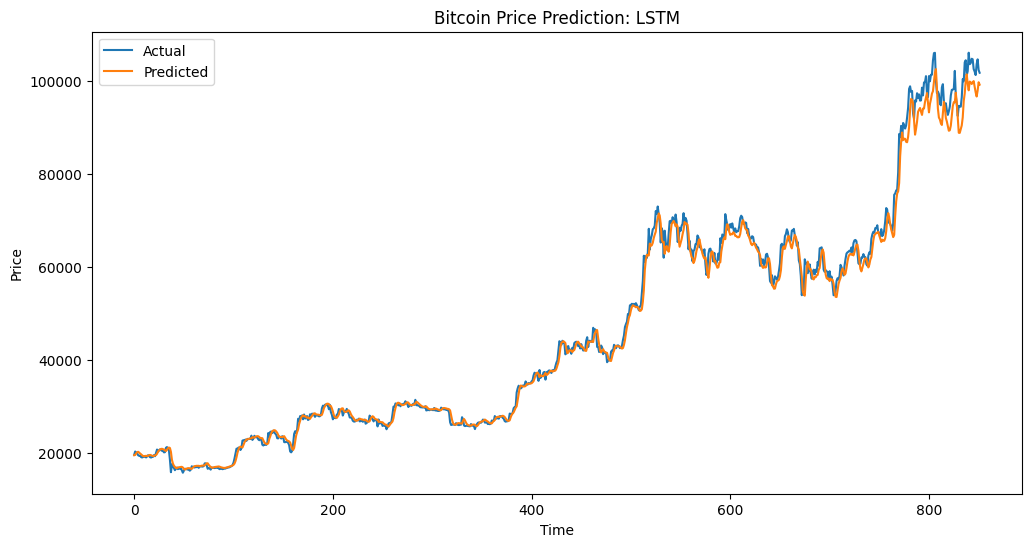

In [352]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Pré-processamento dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[['Price']])

# Criar sequências de treino e teste
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Usar 60 dias anteriores para prever o próximo dia
X, y = create_sequences(data_scaled, seq_length)

# Dividir dados em treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverter normalização
y_test_unscaled = scaler.inverse_transform(y_test)

# Avaliar o desempenho
mse = mean_squared_error(y_test_unscaled, predictions)
mae = mean_absolute_error(y_test_unscaled, predictions)
r2 = r2_score(y_test_unscaled, predictions)

print("LSTM Results:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Bitcoin Price Prediction: LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - loss: 0.0020
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 2.4969e-04
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 1.9861e-04
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 1.5296e-04
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 1.3545e-04
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 1.3522e-04
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 1.2159e-04
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 1.3281e-04
Epoch 9/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 8.7619e-05
Epoch 10/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 9.3678e-05
Epoch 11/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 9.2346e-05
Epoch 12/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 8.8811e-05
Epoch 13/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 7.4002e-05
Epoch 14/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss:

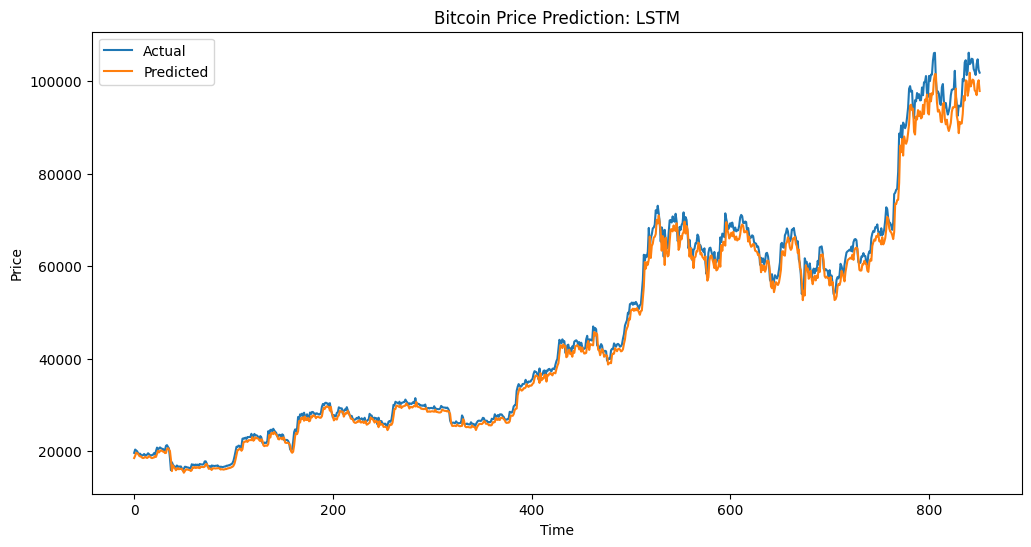

In [353]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Pré-processamento dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[['Price']])

# Criar sequências de treino e teste
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Usar 60 dias anteriores para prever o próximo dia
X, y = create_sequences(data_scaled, seq_length)

# Dividir dados em treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, 1)))  # Aumentar para 100 neurônios
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, batch_size=16, epochs=50)  # Tamanho do lote menor e mais épocas


# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverter normalização
y_test_unscaled = scaler.inverse_transform(y_test)

# Avaliar o desempenho
mse = mean_squared_error(y_test_unscaled, predictions)
mae = mean_absolute_error(y_test_unscaled, predictions)
r2 = r2_score(y_test_unscaled, predictions)

print("LSTM Results:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Bitcoin Price Prediction: LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()